# Colossus tutorial: Peaks in Gaussian random fields

Welcome to the Colossus peaks tutorial.

In [1]:
from __future__ import print_function 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We begin by setting a cosmology:

In [2]:
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18');

## Collapse overdensity, peak height, and non-linear mass

Instead of thinking of halos as objects with a particular mass, we can think of them as statistical fluctuations in the Gaussian random field that seeded cosmic structure. In this picture, the mass of a halo can be expressed as a significance or "peak height", $\nu$. In a Gaussian random field, peak height is trivially defined as overdensity, delta, divided by the variance. Halos, however, are non-linearly collapsed objects; what is their overdensity, and what is the corresponding variance?

We use the approximation of linear collapse to derive a definition. According to the top-hat collapse model ([Gunn & Gott 1972](http://adsabs.harvard.edu/abs/1972ApJ...176....1G)), shells of dark matter turn around once they include a certain overdensity, and one can come up with a crude estimate for when they collapse into a "virialized" object. At this point in time, the overdensity enclosed is $\delta_{\rm c} = 1.686$ (in an Einstein-de Sitter universe). To compute the variance, we assign the halo a spatial scale corresponding to the radius that enclosed the halo's mass initially, called the Lagrangian radius (which depends on our definition of the halo's mass today). 

By combining these two estimates, we obtain an expression for the peak height, $\nu = 1.686 / \sigma(R, z)$. Objects with small peak heights have, on average, collapsed in the past. Objects with $\nu = 1$ are collapsing at the current time, and objects with large peak heights have, on average, not yet collapsed. This logic leads to the concept of the non-linear mass scale, i.e., the mass that is currently collapsing which satisfies $\nu(M_{\rm NL}) = 1$.

Colossus contains functions to evaluate all of these quantities in the peaks module:

In [3]:
from colossus.lss import peaks

For example, we can compute the collapse overdensity as a function of redshift. In a non-EdS universe, there are small corrections to the constant value:

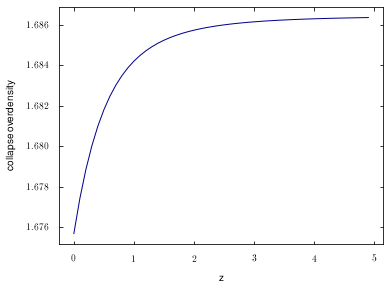

In [4]:
z = np.arange(0.0, 5.0, 0.1)
delta_c = peaks.collapseOverdensity(corrections = True, z = z)
plt.figure()
plt.xlabel('z')
plt.ylabel('collapse overdensity')
plt.plot(z, delta_c, '-');

We see that the change with redshift is less than 1%, so we can happily ignore this effect in the future (and Colossus does so by default). Let's now make a plot of the mass that a given peak height corresponds to at different redshifts:

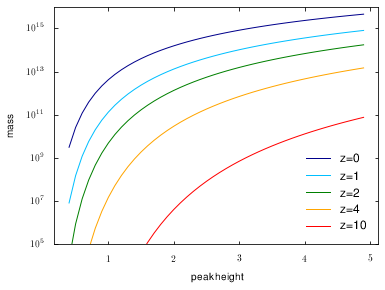

In [5]:
nu = np.arange(0.4, 5.0, 0.1)
z = [0.0, 1.0, 2.0, 4.0, 10.0]
plt.figure()
plt.yscale('log')
plt.xlabel('peak height')
plt.ylabel('mass')
for zz in z:
    M = peaks.massFromPeakHeight(nu, zz)
    plt.plot(nu, M, '-', label = 'z=%.0f' % zz)
plt.ylim(1E5, 1E16)
plt.legend();

All functions related to peak height take extra parameters that determine exactly how the variance and collapse overdensity are computed, for example which filter and power spectrum model are used. Please see the [documentation](https://bdiemer.bitbucket.io/colossus/lss_peaks.html) for more information. 

As mentioned above, the non-linear mass is the mass scale of halos that are, on average, collapsing at a given time. By the definition of peak height, that corresponds to $\nu = 1$. The non-linear mass scale grows with time:

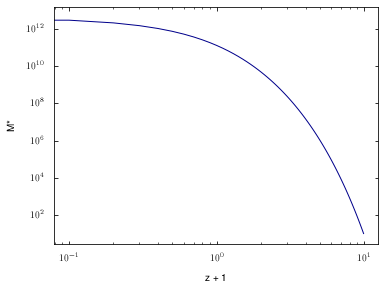

In [6]:
z = np.arange(0.0, 10.0, 0.1)
Mstar = peaks.nonLinearMass(z)
zp1 = z + 1.0
plt.plot()
plt.loglog()
plt.xlabel('z + 1')
plt.ylabel('M*')
plt.plot(z, Mstar, '-');

Today, the non-linear mass is slightly larger than $10^{12} M_{\odot}/h$.

## Peak curvature

We can also compute higher-order properties of the density field, such as the average curvature of peaks (see [Bardeen et al. 1986](http://adsabs.harvard.edu/abs/1986ApJ...304...15B) for the mathematical expressions). Note that the curvature can only be computed using a Gaussian rather than top-hat filter because the higher moments of the variance are not well-behaved otherwise. For the plot, we convert back to the usual top-hat based peak height.

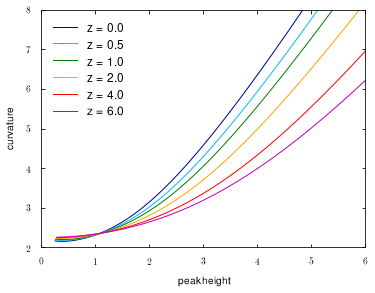

In [7]:
NU_MAX = 12.0
nu = np.arange(0.3, NU_MAX, 0.1)
z = [0.0, 0.5, 1.0, 2.0, 4.0, 6.0]
colors = ['darkblue', 'deepskyblue', 'g', 'orange', 'red', 'm', 'b', 'c']

fig = plt.figure()
plt.xlim(0.0, 6.0)
plt.ylim(2.0, 8.0)
plt.xlabel(r'peak height')
plt.ylabel(r'curvature')
for j in range(len(z)):
    M = peaks.massFromPeakHeight(nu, z[j], sigma_args = {'filt': 'gaussian'})
    _, _, x_approx, _, _ = peaks.peakCurvature(M, z[j], exact = False)
    nu_TH = peaks.peakHeight(M, z[j], sigma_args = {'filt': 'tophat'})
    plt.plot(nu_TH, x_approx, '-', color = colors[j], label = 'z = %.1f' % z[j])
plt.legend(loc = 2);

While peak height quantifies how high a fluctuation over the background a halo is, peak curvature tells us something about the shape of the initial peak. However, note the cloud-in-cloud problem ([Bardeen et al. 1986](http://adsabs.harvard.edu/abs/1986ApJ...304...15B)): not all peaks end up forming halos, particularly small peaks will often get swallowed by other peaks. Thus, the average peak curvature is not necessarily equal to the average curvature of peaks that form halos.
